In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
import math

In [2]:
precincts = gpd.read_file('../data/precincts.geojson')
incidents = gpd.read_file('../data/incidents.geojson')
precincts.crs = 'EPSG:4326'
incidents.crs = 'EPSG:4326'

print(precincts.crs)
print(incidents.crs)

EPSG:4326
EPSG:4326


In [3]:
art = pd.read_csv('../data/art.csv')
markers = pd.read_csv('../data/markers.csv')

In [4]:
print(markers.dtypes)

markers = markers[markers.Latitude.notnull()]


Number               int64
Year Erected       float64
Marker Name         object
Marker Text         object
Civil War Site?     object
Notes               object
Location            object
Latitude           float64
Longitude          float64
Condition           object
Mapped Location     object
dtype: object


In [5]:
print(art.dtypes)
art = art[art.Latitude.notnull()]

Title                 object
Artist Last Name      object
Artist First Name     object
Location              object
Medium                object
Type                  object
Description           object
Latitude             float64
Longitude            float64
Mapped Location       object
dtype: object


In [6]:
art['geometry'] = art.apply(lambda x: Point(x.Latitude, x.Longitude), axis = 1)
markers['geometry'] = markers.apply(lambda x: Point(x.Latitude, x.Longitude), axis = 1)

In [7]:
art_geo = gpd.GeoDataFrame(art,
                          crs = precincts.crs,
                          geometry = art.geometry)

In [8]:
markers_geo = gpd.GeoDataFrame(markers,
                              crs = precincts.crs,
                              geometry = markers.geometry)

In [9]:
precincts = precincts[['precinct', 'geometry']]

In [10]:
incidents = incidents[['zip_code', 'offense_nibrs',
       'incident_number',
       'offense_description',
        'incident_reported', 
      'zone', 'latitude', 'longitude',
       'incident_occurred', 'primary_key', 'geometry']]

In [11]:
print(incidents.columns)
print(incidents.head())


Index(['zip_code', 'offense_nibrs', 'incident_number', 'offense_description',
       'incident_reported', 'zone', 'latitude', 'longitude',
       'incident_occurred', 'primary_key', 'geometry'],
      dtype='object')
  zip_code offense_nibrs incident_number               offense_description  \
0    37219           715     20180001284                    FOUND PROPERTY   
1     None           290     20180000385            DAMAGE PROP - BUSINESS   
2     None           23D     20180019704                  LARC - FROM BLDG   
3    37206           520     20180004680  WEAPON OFFENSE, CRIMINAL ATTEMPT   
4     None           240     20180067933                     VEHICLE THEFT   

     incident_reported  zone latitude longitude    incident_occurred  \
0  2018-01-01T14:44:00  None   36.169   -86.785  2018-01-01T00:10:00   
1  2018-01-01T05:06:00  None    36.21    -86.77  2018-01-01T03:50:00   
2  2018-01-06T22:39:00  None    36.16    -86.69  2018-01-06T20:30:00   
3  2018-01-02T15:41:00   2

In [12]:
incidents_by_precinct = gpd.sjoin(incidents, precincts, op = 'within')

In [13]:
incidents_by_precinct.reset_index(drop=True)

,zip_code,offense_nibrs,incident_number,offense_description,incident_reported,zone,latitude,longitude,incident_occurred,primary_key,geometry,index_right,precinct
0,37219,715,20180001284,FOUND PROPERTY,2018-01-01T14:44:00,None,36.169,-86.785,2018-01-01T00:10:00,20180001284_15,POINT (-86.78500 36.16900),0,CENTRAL
1,None,26A,20181044348,FRAUD - SWINDLE,2018-12-18T16:06:00,None,36.16,-86.78,2018-12-17T11:20:00,20181044348_13,POINT (-86.78000 36.16000),0,CENTRAL
2,None,290,20180800096,DAMAGE PROP - BUSINESS,2018-09-19T11:59:00,None,36.16,-86.77,2018-09-08T23:13:00,20180800096_11,POINT (-86.77000 36.16000),0,CENTRAL
3,37208,35A,20180521278,MARIJUANA - POSSESS,2018-06-15T20:11:00,413,36.176,-86.782,2018-06-15T19:27:00,20180521278_11,POINT (-86.78200 36.17600),0,CENTRAL
4,None,740,20180820396,POLICE INQUIRY,2018-09-26T13:48:00,None,36.17,-86.78,2018-09-17T09:00:00,20180820396_11,POINT (-86.78000 36.17000),0,CENTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...
124156,37115,740,20180625787,POLICE INQUIRY,2018-07-20T19:40:00,723,36.268,-86.719,2018-07-20T18:14:00,20180625787_11,POINT (-86.71900 36.26800),3,MADISON
124157,None,23C,20180622722,SHOPLIFTING,2018-07-19T16:06:00,None,36.27,-86.76,2018-07-19T15:30:00,20180622722_11,POINT (-86.76000 36.27000),3,MADISON
124158,None,290,20180264289,DAMAGE PROP - PRIVATE,2018-03-22T22:20:00,None,36.24,-86.73,2018-03-22T20:30:00,20180264289_11,POINT (-86.73000 36.24000),3,MADISON
124159,37072,240,20180235360,"VEHICLE OFFENSE, CRIMINAL ATTEMPT",2018-03-14T03:55:00,None,36.305,-86.703,2018-03-14T00:20:00,20180235360_11,POINT (-86.70300 36.30500),3,MADISON


In [14]:
incidents_by_precinct['offense_nibrs'].value_counts()[50:75]



23B    71
90H    51
23E    45
11C    39
90E    35
26G    27
39C    25
26F    18
90D    18
40C    13
90B    13
90G    11
730     8
09C     7
40B     4
39A     4
280     3
39D     2
90I     2
700     2
09B     2
36B     2
39B     1
510     1
13c     1
Name: offense_nibrs, dtype: int64

In [15]:
skin = incidents_by_precinct[incidents_by_precinct.offense_nibrs == "40A"]
skin.to_csv('../data/skin.csv', index=False)
drunk = incidents_by_precinct[incidents_by_precinct.offense_nibrs == "90E"]
drunk.to_csv('../data/drunk.csv', index=False)

In [16]:
skin.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 215 entries, 23035 to 124615
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   zip_code             213 non-null    object  
 1   offense_nibrs        215 non-null    object  
 2   incident_number      215 non-null    object  
 3   offense_description  215 non-null    object  
 4   incident_reported    215 non-null    object  
 5   zone                 210 non-null    object  
 6   latitude             215 non-null    object  
 7   longitude            215 non-null    object  
 8   incident_occurred    215 non-null    object  
 9   primary_key          215 non-null    object  
 10  geometry             215 non-null    geometry
 11  index_right          215 non-null    int64   
 12  precinct             215 non-null    object  
dtypes: geometry(1), int64(1), object(11)
memory usage: 23.5+ KB


In [17]:
center = precincts[precincts.precinct == 'CENTRAL'].geometry.centroid

In [18]:
center_pt = [center.y, center.x]

In [19]:
my_map = folium.Map(location = center_pt, zoom_start = 11)
style = {'fillColor': 'green', 'color': 'green'}
folium.GeoJson('../data/parks.geojson', style_function = lambda x: style).add_to(my_map)
marker_cluster1 = MarkerCluster(color='orange').add_to(my_map)
marker_cluster2 = MarkerCluster(color='green').add_to(my_map)
marker_cluster3 = MarkerCluster(color='red').add_to(my_map)
marker_cluster4 = MarkerCluster(color='red').add_to(my_map)
for index, value in art_geo.iterrows():
    loc = [value['Latitude'], value['Longitude']]
    pop = str(value['Title']) + "<br/>" + str(value['Artist First Name']) + ' ' + str(value['Artist Last Name'])
    marker = folium.Marker(location = loc,
                           popup = folium.Popup(pop, max_width=150,min_width=50),
                           icon = folium.Icon(color='orange', icon = 'star'))
    marker.add_to(marker_cluster1)

for index, value in markers_geo.iterrows():
    loc = [value['Latitude'], value['Longitude']]
    pop = str(value['Marker Name']) + "<br/>" + str(value['Year Erected'])[0:4]
    marker = folium.Marker(location = loc,
                          popup = folium.Popup(pop, max_width=150,min_width=50),
                          icon = folium.Icon(color='green', icon = 'star'))
    marker.add_to(marker_cluster2)    
    
for index, value in skin.iterrows():
    loc = [value['latitude'], value['longitude']]
    pop = str(value['incident_number']) + "<br/>" + str(value['offense_description'])+ "<br/>" + str(value['incident_occurred'])
    marker = folium.Marker(location = loc,
                          popup = folium.Popup(pop, max_width=150,min_width=50),
                          icon = folium.Icon(color='red', icon='heart'))
    marker.add_to(marker_cluster3)  
    
for index, value in drunk.iterrows():
    loc = [value['latitude'], value['longitude']]
    pop = str(value['incident_number']) + "<br/>" + str(value['offense_description'])+ "<br/>" + str(value['incident_occurred'])
    marker = folium.Marker(location = loc,
                          popup = folium.Popup(pop, max_width=150,min_width=50),
                          icon = folium.Icon(color='red', icon='glass'))
    marker.add_to(marker_cluster4)  
    
    
my_map



In [20]:
help(folium.GeoJson)

Help on class GeoJson in module folium.features:

class GeoJson(folium.map.Layer)
 |  GeoJson(data, style_function=None, highlight_function=None, name=None, overlay=True, control=True, show=True, smooth_factor=None, tooltip=None, embed=True, popup=None)
 |  
 |  Creates a GeoJson object for plotting into a Map.
 |  
 |  Parameters
 |  ----------
 |  data: file, dict or str.
 |      The GeoJSON data you want to plot.
 |      * If file, then data will be read in the file and fully
 |      embedded in Leaflet's JavaScript.
 |      * If dict, then data will be converted to JSON and embedded
 |      in the JavaScript.
 |      * If str, then data will be passed to the JavaScript as-is.
 |  style_function: function, default None
 |      Function mapping a GeoJson Feature to a style dict.
 |  highlight_function: function, default None
 |      Function mapping a GeoJson Feature to a style dict for mouse events.
 |  name : string, default None
 |      The name of the Layer, as it will appear in 

In [21]:
central = incidents_by_precinct[(incidents_by_precinct.precinct == 'CENTRAL') & (incidents_by_precinct.offense_nibrs == '35A')]
central.to_csv('../data/central_drug.csv', index=False)

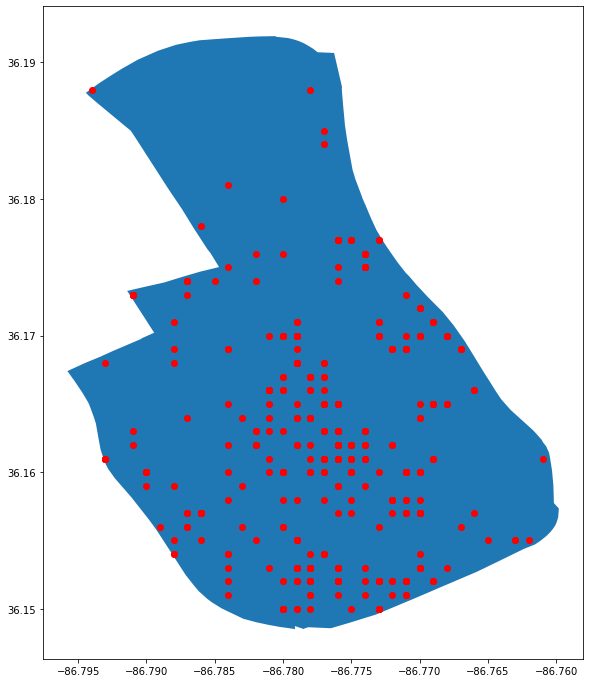

In [22]:
# ax = precincts.plot()
ax = precincts[precincts.precinct == "CENTRAL"].plot(figsize=(10,12))
central.plot(ax=ax, legend = True, color = 'red')

# art_geo.plot(ax = ax, color="green")
plt.show()